# Импорты и настройка

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from joblib import dump
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay,
    RocCurveDisplay, PrecisionRecallDisplay
)
from sklearn.inspection import permutation_importance

In [2]:
RANDOM_STATE = 42

ART_DIR = "artifacts"
FIG_DIR = os.path.join(ART_DIR, "figures")
os.makedirs(FIG_DIR, exist_ok=True)

plt.rcParams["figure.figsize"] = (7, 5)

# Загрузка данных

In [3]:
DATA_PATH = "S06-hw-dataset-04.csv"

df = pd.read_csv(DATA_PATH)

In [46]:
df.shape

(25000, 62)

In [4]:
df.head()

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f52,f53,f54,f55,f56,f57,f58,f59,f60,target
0,1,-1.250210,1.423474,-0.225004,-4.023138,-0.832729,-0.550874,1.772090,2.761690,-0.698750,...,10.938269,0.501178,1.600001,0.314212,1.209735,1.355697,-5.338924,1.153944,-0.153934,0
1,2,0.074328,0.376429,0.212831,-0.502074,2.017405,0.625496,1.943785,1.242030,-0.524090,...,7.775262,-4.550195,6.272586,-0.932162,-0.228543,1.735220,-3.827828,0.292165,0.273720,0
2,3,0.638481,0.060968,0.746760,2.479653,-0.292858,-0.078139,-2.918423,-0.013186,1.009135,...,-4.448447,-9.593179,-3.093519,0.029321,0.605511,0.829103,-0.085985,2.891408,0.766221,0
3,4,1.712916,-1.350969,-0.256473,1.622074,-0.445141,0.911932,-3.440345,1.505192,-1.104348,...,-1.619072,-3.237479,-5.474038,-1.582475,0.198137,3.823409,0.880395,1.148610,0.136732,0
4,5,0.905676,-0.206545,-0.068806,4.086026,-1.010045,-0.772644,-4.207688,2.506104,1.589143,...,-2.396844,-10.540129,-5.532811,-1.231203,0.000119,4.298572,-1.558235,0.924673,0.111668,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      25000 non-null  int64  
 1   f01     25000 non-null  float64
 2   f02     25000 non-null  float64
 3   f03     25000 non-null  float64
 4   f04     25000 non-null  float64
 5   f05     25000 non-null  float64
 6   f06     25000 non-null  float64
 7   f07     25000 non-null  float64
 8   f08     25000 non-null  float64
 9   f09     25000 non-null  float64
 10  f10     25000 non-null  float64
 11  f11     25000 non-null  float64
 12  f12     25000 non-null  float64
 13  f13     25000 non-null  float64
 14  f14     25000 non-null  float64
 15  f15     25000 non-null  float64
 16  f16     25000 non-null  float64
 17  f17     25000 non-null  float64
 18  f18     25000 non-null  float64
 19  f19     25000 non-null  float64
 20  f20     25000 non-null  float64
 21  f21     25000 non-null  float64
 22

In [6]:
df.describe(include="all")

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f52,f53,f54,f55,f56,f57,f58,f59,f60,target
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,12500.500000,-0.000386,-0.004872,0.003202,0.335329,-0.000563,-0.010118,0.001182,0.957385,-0.004658,...,-0.166251,-3.387506,1.749793,-0.013017,-0.001383,0.893365,-0.909479,0.000570,-0.000754,0.04920
std,7217.022701,1.001623,0.995606,1.004367,3.207537,0.993965,1.002172,2.432162,1.830223,1.013470,...,4.234741,4.331576,5.318660,1.001594,0.996409,2.445185,1.962618,0.994320,0.997167,0.21629
min,1.000000,-4.370993,-4.087073,-4.103875,-13.249937,-4.118778,-3.895974,-8.883224,-8.132548,-4.068933,...,-20.021141,-18.332290,-20.336666,-4.349216,-4.119472,-9.508509,-7.919287,-4.038312,-3.812255,0.00000
25%,6250.750000,-0.680165,-0.675100,-0.675426,-1.750048,-0.669764,-0.674374,-1.647977,-0.217260,-0.688278,...,-2.897904,-6.278403,-1.775889,-0.689962,-0.676191,-0.735473,-2.226959,-0.666367,-0.665861,0.00000
50%,12500.500000,0.001859,-0.000247,0.013272,0.403483,-0.001309,-0.005994,-0.011349,0.963009,0.000414,...,-0.396946,-3.462072,1.931851,-0.020933,-0.004193,0.888535,-0.923354,0.004381,0.002420,0.00000
75%,18750.250000,0.679702,0.659523,0.683437,2.486453,0.672299,0.652629,1.658680,2.167758,0.681040,...,2.344956,-0.578540,5.473886,0.661300,0.673722,2.516790,0.395648,0.666474,0.665918,0.00000
max,25000.000000,4.208888,3.984564,3.793442,15.288250,4.020733,4.279607,9.538525,9.321099,4.261349,...,20.717964,18.818764,20.688069,4.338337,3.902131,11.880651,6.778980,3.834922,4.012639,1.00000


# Проверки: таргет, пропуски, типы

In [7]:
print("Target counts:")
print(df["target"].value_counts())

Target counts:
target
0    23770
1     1230
Name: count, dtype: int64


In [8]:
print("\nTarget shares:")
print(df["target"].value_counts(normalize=True))


Target shares:
target
0    0.9508
1    0.0492
Name: proportion, dtype: float64


In [10]:
df.isna().sum().sort_values(ascending=False)

id        0
f01       0
f02       0
f03       0
f04       0
         ..
f57       0
f58       0
f59       0
f60       0
target    0
Length: 62, dtype: int64

In [11]:
print("\nDtypes:")
df.dtypes.value_counts()


Dtypes:


float64    60
int64       2
Name: count, dtype: int64

# Формирование X/y

In [12]:
X = df.drop(['id', 'target'], axis=1)
y = df['target']

print("X shape:", X.shape, "| y shape:", y.shape)

X shape: (25000, 60) | y shape: (25000,)


# Train/Test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=RANDOM_STATE,
    stratify=y
)

In [15]:
print("Train:", X_train.shape, "Test:", X_test.shape)
print("Train target shares:\n", y_train.value_counts(normalize=True))
print("\nTest target shares:\n", y_test.value_counts(normalize=True))

Train: (18750, 60) Test: (6250, 60)
Train target shares:
 target
0    0.950773
1    0.049227
Name: proportion, dtype: float64

Test target shares:
 target
0    0.95088
1    0.04912
Name: proportion, dtype: float64


# Helper-функции метрик/графиков

In [16]:
def is_binary_target(y: pd.Series) -> bool:
    return pd.Series(y).nunique() == 2

def safe_roc_auc(model, X_eval, y_eval):
    """ROC-AUC: только для бинарной задачи и только если есть proba/decision."""
    if not is_binary_target(y_eval):
        return np.nan

    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_eval)[:, 1]
        return roc_auc_score(y_eval, proba)

    if hasattr(model, "decision_function"):
        score = model.decision_function(X_eval)
        return roc_auc_score(y_eval, score)

    return np.nan

def get_scores(model, X_eval, y_eval):
    y_pred = model.predict(X_eval)
    scores = {"accuracy": accuracy_score(y_eval, y_pred)}

    if is_binary_target(y_eval):
        scores["f1"] = f1_score(y_eval, y_pred)
        scores["roc_auc"] = safe_roc_auc(model, X_eval, y_eval)
    else:
        scores["f1_macro"] = f1_score(y_eval, y_pred, average="macro")
        # multi-class AUC опционально (не требуется), ставим nan
        scores["roc_auc_ovr"] = np.nan

    return scores

def plot_confusion(model, X_eval, y_eval, title, filename):
    y_pred = model.predict(X_eval)
    cm = confusion_matrix(y_eval, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(values_format="d")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(os.path.join(FIG_DIR, filename), dpi=150)
    plt.show()

def plot_roc_pr_binary(model, X_eval, y_eval, prefix):
    """ROC/PR только для бинарной задачи."""
    if not is_binary_target(y_eval):
        print("ROC/PR skipped: not a binary task.")
        return

    # ROC
    try:
        plt.figure()
        RocCurveDisplay.from_estimator(model, X_eval, y_eval)
        plt.title(f"ROC curve — {prefix}")
        plt.tight_layout()
        plt.savefig(os.path.join(FIG_DIR, f"{prefix}_roc.png"), dpi=150)
        plt.show()
    except Exception as e:
        print("ROC plot failed:", e)

    # PR
    try:
        plt.figure()
        PrecisionRecallDisplay.from_estimator(model, X_eval, y_eval)
        plt.title(f"PR curve — {prefix}")
        plt.tight_layout()
        plt.savefig(os.path.join(FIG_DIR, f"{prefix}_pr.png"), dpi=150)
        plt.show()
    except Exception as e:
        print("PR plot failed:", e)


# Baselines

## DummyClassifier baseline

In [17]:
dummy = DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE)
dummy.fit(X_train, y_train)

,"strategy strategy: {""most_frequent"", ""prior"", ""stratified"", ""uniform"", ""constant""}, default=""prior""Strategy to use to generate predictions.* ""most_frequent"": the `predict` method always returns the most frequent class label in the observed `y` argument passed to `fit`. The `predict_proba` method returns the matching one-hot encoded vector.* ""prior"": the `predict` method always returns the most frequent class label in the observed `y` argument passed to `fit` (like ""most_frequent""). ``predict_proba`` always returns the empirical class distribution of `y` also known as the empirical class prior distribution.* ""stratified"": the `predict_proba` method randomly samples one-hot vectors from a multinomial distribution parametrized by the empirical class prior probabilities. The `predict` method returns the class label which got probability one in the one-hot vector of `predict_proba`. Each sampled row of both methods is therefore independent and identically distributed.* ""uniform"": generates predictions uniformly at random from the list of unique classes observed in `y`, i.e. each class has equal probability.* ""constant"": always predicts a constant label that is provided by the user. This is useful for metrics that evaluate a non-majority class. .. versionchanged:: 0.24 The default value of `strategy` has changed to ""prior"" in version 0.24.",'most_frequent'
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness to generate the predictions when``strategy='stratified'`` or ``strategy='uniform'``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42
,"constant constant: int or str or array-like of shape (n_outputs,), default=NoneThe explicit constant as predicted by the ""constant"" strategy. Thisparameter is useful only for the ""constant"" strategy.",None


In [18]:
dummy_scores = get_scores(dummy, X_test, y_test)
print("Dummy scores:", dummy_scores)

Dummy scores: {'accuracy': 0.95088, 'f1': 0.0, 'roc_auc': 0.5}


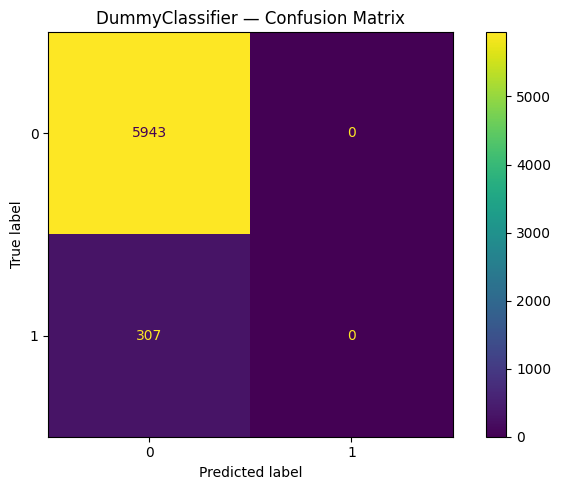

<Figure size 700x500 with 0 Axes>

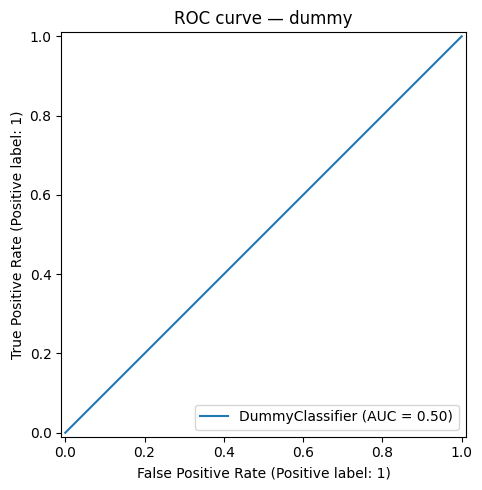

<Figure size 700x500 with 0 Axes>

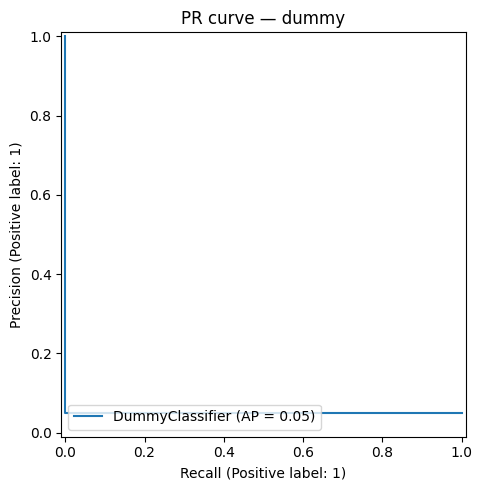

In [19]:
plot_confusion(dummy, X_test, y_test, "DummyClassifier — Confusion Matrix", "dummy_cm.png")
plot_roc_pr_binary(dummy, X_test, y_test, "dummy")

## LogisticRegression baseline

In [20]:
lr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=2000, random_state=RANDOM_STATE))
])

In [21]:
lr.fit(X_train, y_train)
lr_scores = get_scores(lr, X_test, y_test)
print("LogReg scores:", lr_scores)

LogReg scores: {'accuracy': 0.96272, 'f1': 0.41309823677581864, 'roc_auc': 0.8397074049287998}


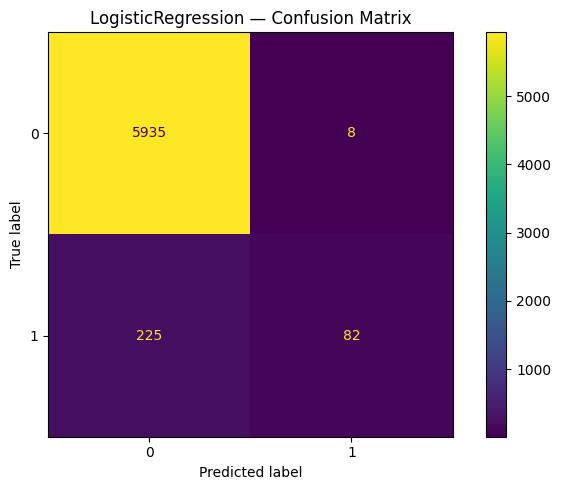

<Figure size 700x500 with 0 Axes>

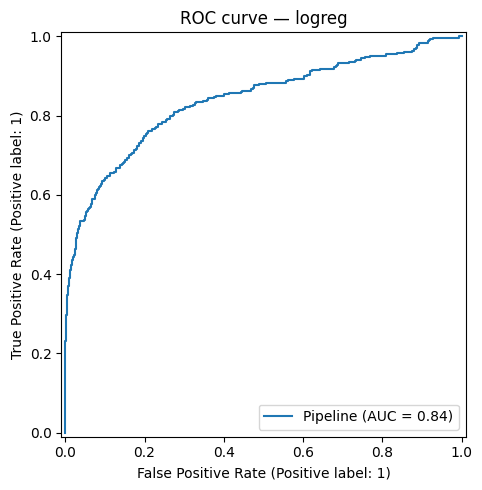

<Figure size 700x500 with 0 Axes>

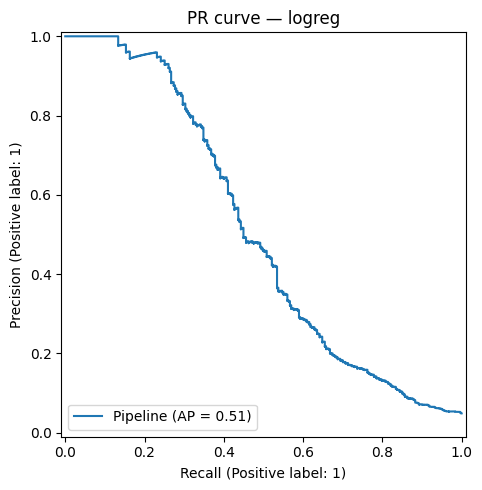

In [22]:
plot_confusion(lr, X_test, y_test, "LogisticRegression — Confusion Matrix", "logreg_cm.png")
plot_roc_pr_binary(lr, X_test, y_test, "logreg")

## (DT / RF / Boosting)

In [23]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# метрика оптимизации для GridSearchCV
if is_binary_target(y_train):
    cv_scoring = "roc_auc"
else:
    cv_scoring = "f1_macro"

print("CV scoring:", cv_scoring)


CV scoring: roc_auc


In [24]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

dt_grid = {
    "max_depth": [2, 3, 5, 7, None],
    "min_samples_leaf": [1, 5, 10, 20]
}

dt_search = GridSearchCV(
    estimator=dt,
    param_grid=dt_grid,
    cv=cv,
    scoring=cv_scoring,
    n_jobs=-1
)
dt_search.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [2, 3, ...], 'min_samples_leaf': [1, 5, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 :

In [25]:
best_dt = dt_search.best_estimator_
print("Best DT params:", dt_search.best_params_)
print("Best DT CV score:", dt_search.best_score_)

Best DT params: {'max_depth': None, 'min_samples_leaf': 20}
Best DT CV score: 0.7944797313188933


In [26]:
dt_scores = get_scores(best_dt, X_test, y_test)
print("Best DT scores:", dt_scores)

Best DT scores: {'accuracy': 0.96848, 'f1': 0.5887265135699373, 'roc_auc': 0.8279721414238741}


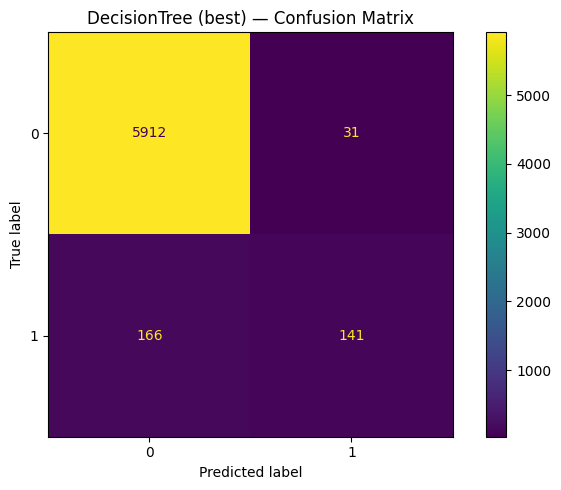

<Figure size 700x500 with 0 Axes>

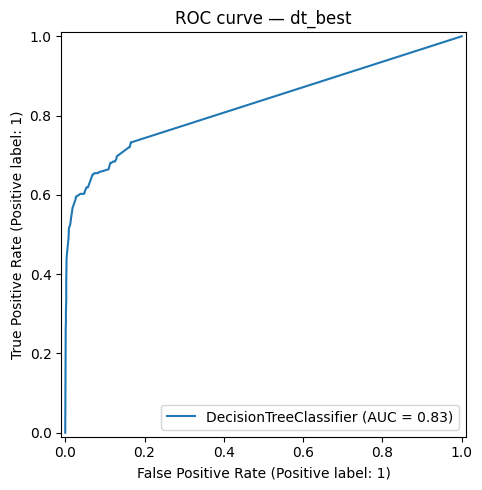

<Figure size 700x500 with 0 Axes>

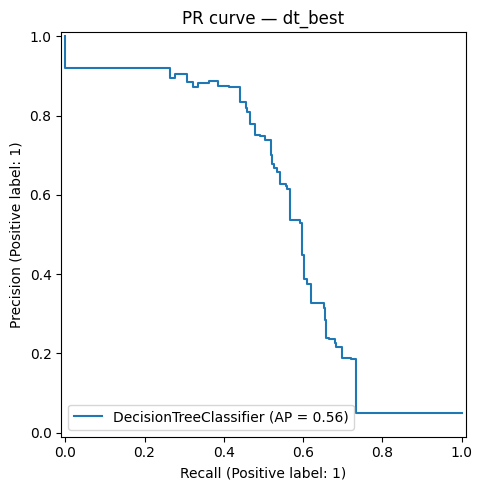

In [27]:
plot_confusion(best_dt, X_test, y_test, "DecisionTree (best) — Confusion Matrix", "dt_cm.png")
plot_roc_pr_binary(best_dt, X_test, y_test, "dt_best")

In [29]:
rf = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)

rf_grid = {
    "n_estimators": [200],          # достаточно
    "max_depth": [None, 10],
    "min_samples_leaf": [1, 5],
    "max_features": ["sqrt"]
}


rf_search = GridSearchCV(
    estimator=rf,
    param_grid=rf_grid,
    cv=cv,
    scoring=cv_scoring,
    n_jobs=-1
)
rf_search.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [None, 10], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 5], 'n_estimators': [200]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold 

In [30]:
best_rf = rf_search.best_estimator_
print("Best RF params:", rf_search.best_params_)
print("Best RF CV score:", rf_search.best_score_)

Best RF params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
Best RF CV score: 0.8836905887480034


In [31]:
rf_scores = get_scores(best_rf, X_test, y_test)
print("Best RF scores:", rf_scores)

Best RF scores: {'accuracy': 0.97296, 'f1': 0.6219239373601789, 'roc_auc': 0.8964377109138333}


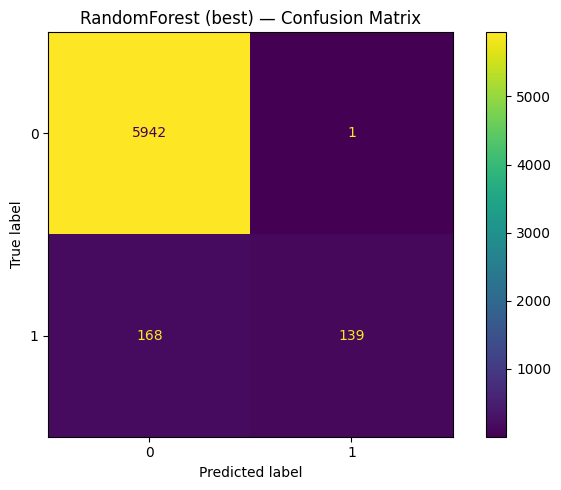

<Figure size 700x500 with 0 Axes>

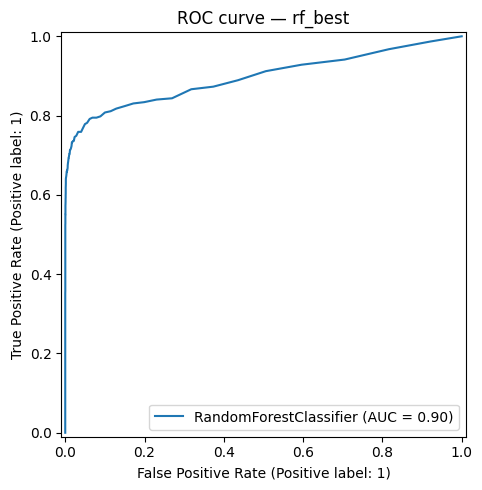

<Figure size 700x500 with 0 Axes>

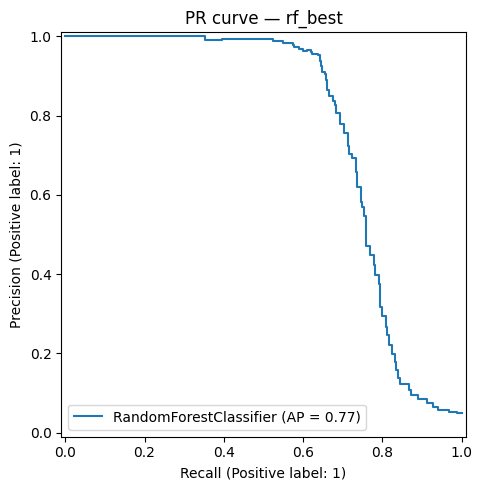

In [32]:
plot_confusion(best_rf, X_test, y_test, "RandomForest (best) — Confusion Matrix", "rf_cm.png")
plot_roc_pr_binary(best_rf, X_test, y_test, "rf_best")

In [33]:
hgb = HistGradientBoostingClassifier(random_state=RANDOM_STATE)

hgb_grid = {
    "max_depth": [3, 5, None],
    "learning_rate": [0.05, 0.1],
    "max_iter": [200, 400],
    "min_samples_leaf": [20, 50, 100]
}

hgb_search = GridSearchCV(
    estimator=hgb,
    param_grid=hgb_grid,
    cv=cv,
    scoring=cv_scoring,
    n_jobs=-1
)
hgb_search.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",HistGradientB...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, ...], 'max_iter': [200, 400], 'min_samples_leaf': [20, 50, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time f

In [34]:
best_hgb = hgb_search.best_estimator_
print("Best HGB params:", hgb_search.best_params_)
print("Best HGB CV score:", hgb_search.best_score_)

Best HGB params: {'learning_rate': 0.05, 'max_depth': 5, 'max_iter': 200, 'min_samples_leaf': 50}
Best HGB CV score: 0.8959266845606839


In [37]:
hgb_scores = get_scores(best_hgb, X_test, y_test)
print("Best HGB scores:", hgb_scores)

Best HGB scores: {'accuracy': 0.9792, 'f1': 0.7368421052631579, 'roc_auc': 0.9024187983454107}


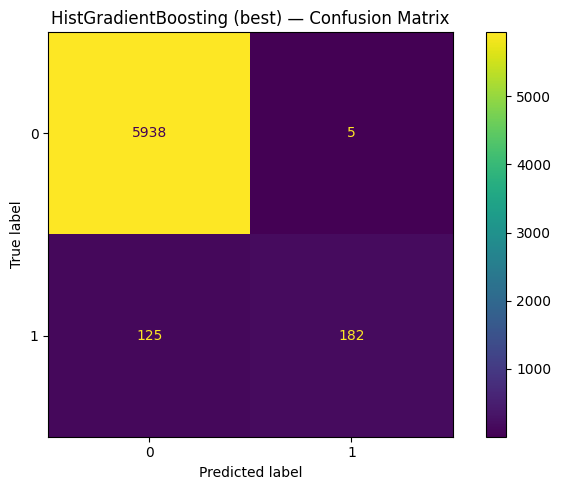

<Figure size 700x500 with 0 Axes>

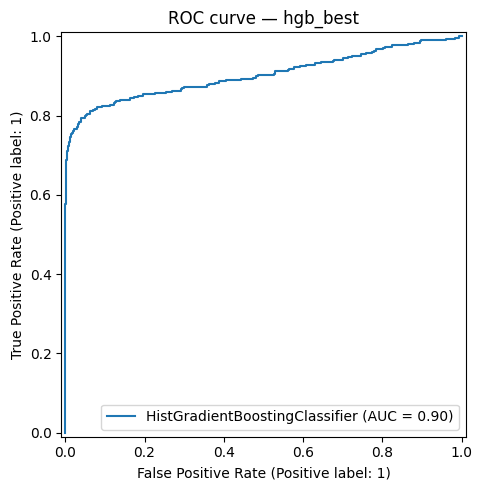

<Figure size 700x500 with 0 Axes>

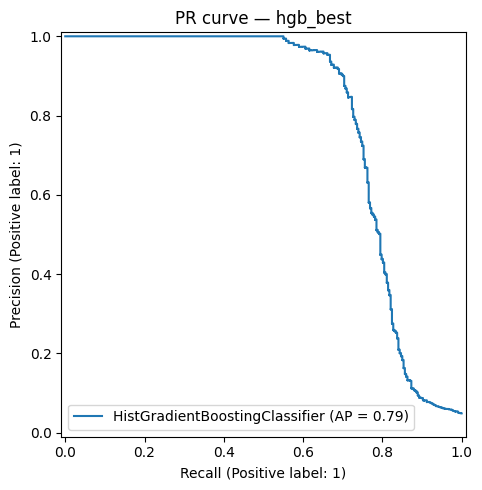

In [38]:
plot_confusion(best_hgb, X_test, y_test, "HistGradientBoosting (best) — Confusion Matrix", "hgb_cm.png")
plot_roc_pr_binary(best_hgb, X_test, y_test, "hgb_best")

# Метрики качества: сводная таблица

In [39]:
metrics_test = {
    "DummyClassifier": dummy_scores,
    "LogisticRegression": lr_scores,
    "DecisionTree": dt_scores,
    "RandomForest": rf_scores,
    "HistGradientBoosting": hgb_scores,
}

rows = []
for name, sc in metrics_test.items():
    row = {"model": name}
    row.update(sc)
    rows.append(row)

results_df = pd.DataFrame(rows)
display(results_df)


,model,accuracy,f1,roc_auc
0,DummyClassifier,0.95088,0.000000,0.500000
1,LogisticRegression,0.96272,0.413098,0.839707
2,DecisionTree,0.96848,0.588727,0.827972
3,RandomForest,0.97296,0.621924,0.896438
4,HistGradientBoosting,0.97920,0.736842,0.902419


# Выбор лучшей модели

In [40]:
if is_binary_target(y_test):
    selection_metric = "roc_auc"
else:
    selection_metric = "f1_macro"

best_row = results_df.sort_values(selection_metric, ascending=False).iloc[0]
best_name = best_row["model"]

print("Selection metric:", selection_metric)
print("Best model:", best_name)
print("Best test metrics:", best_row.to_dict())

best_model = {
    "DummyClassifier": dummy,
    "LogisticRegression": lr,
    "DecisionTree": best_dt,
    "RandomForest": best_rf,
    "HistGradientBoosting": best_hgb
}[best_name]


Selection metric: roc_auc
Best model: HistGradientBoosting
Best test metrics: {'model': 'HistGradientBoosting', 'accuracy': 0.9792, 'f1': 0.7368421052631579, 'roc_auc': 0.9024187983454107}


# Интерпретация: permutation importance

,feature,importance_mean,importance_std
53,f54,0.024490,0.003639
24,f25,0.018275,0.004006
46,f47,0.010805,0.005613
57,f58,0.010796,0.004066
32,f33,0.009541,0.001883
37,f38,0.009130,0.002338
3,f04,0.006990,0.001899
52,f53,0.005330,0.003316
40,f41,0.004257,0.002045
15,f16,0.002557,0.001449


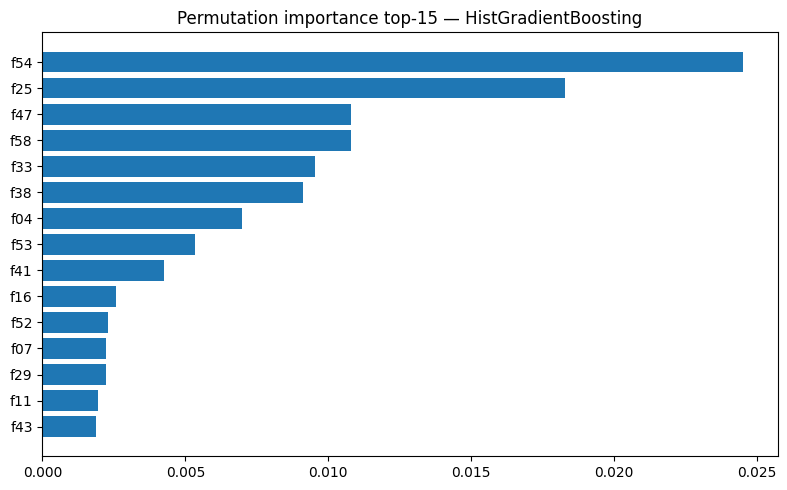

In [41]:
scoring_for_perm = "roc_auc" if is_binary_target(y_test) else "f1_macro"

perm = permutation_importance(
    best_model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    scoring=scoring_for_perm
)

imp_df = pd.DataFrame({
    "feature": X.columns,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False)

display(imp_df.head(15))

top_k = 15
plt.figure(figsize=(8, 5))
plt.barh(imp_df["feature"].head(top_k)[::-1], imp_df["importance_mean"].head(top_k)[::-1])
plt.title(f"Permutation importance top-{top_k} — {best_name}")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "best_perm_importance.png"), dpi=150)
plt.show()


Для лучшей модели (HistGradientBoostingClassifier) была рассчитана permutation importance
на test-выборке. Анализ показывает, что наибольший вклад в качество модели вносят признаки
f54 и f25, влияние которых существенно превосходит остальные признаки. Перестановка этих
признаков приводит к наибольшему снижению целевой метрики, что указывает на их ключевую
роль в принятии решений моделью.

Вторую группу значимых признаков составляют f47, f58, f33 и f38, которые также заметно
влияют на результат, но в меньшей степени. Остальные признаки из топ-15 обладают
умеренным вкладом и, вероятно, участвуют в формировании более тонких нелинейных
взаимодействий, характерных для ансамблевых моделей.

Полученная картина соответствует ожиданиям для синтетического fraud-like датасета:
информация о целевом классе концентрируется в ограниченном числе информативных признаков,
в то время как большая часть признаков вносит вспомогательный или шумовой вклад.
Именно такие ситуации особенно хорошо обрабатываются boosting-моделями, способными
последовательно усиливать влияние наиболее информативных признаков и игнорировать шум.


# Сохранение метрик

In [42]:
with open(os.path.join(ART_DIR, "metrics_test.json"), "w", encoding="utf-8") as f:
    json.dump(metrics_test, f, indent=2, ensure_ascii=False)

print("Saved:", os.path.join(ART_DIR, "metrics_test.json"))

Saved: artifacts\metrics_test.json


In [43]:
search_summaries = {
    "DecisionTree": {
        "best_params": dt_search.best_params_,
        "best_cv_score": float(dt_search.best_score_),
        "cv_metric": cv_scoring,
    },
    "RandomForest": {
        "best_params": rf_search.best_params_,
        "best_cv_score": float(rf_search.best_score_),
        "cv_metric": cv_scoring,
    },
    "HistGradientBoosting": {
        "best_params": hgb_search.best_params_,
        "best_cv_score": float(hgb_search.best_score_),
        "cv_metric": cv_scoring,
    },
}

with open(os.path.join(ART_DIR, "search_summaries.json"), "w", encoding="utf-8") as f:
    json.dump(search_summaries, f, indent=2, ensure_ascii=False)

print("Saved:", os.path.join(ART_DIR, "search_summaries.json"))


Saved: artifacts\search_summaries.json


In [44]:
dump(best_model, os.path.join(ART_DIR, "best_model.joblib"))
print("Saved:", os.path.join(ART_DIR, "best_model.joblib"))


Saved: artifacts\best_model.joblib


In [45]:
best_model_meta = {
    "best_model_name": best_name,
    "selection_metric": selection_metric,
    "test_metrics": best_row.drop("model").to_dict(),
    "hyperparameters": best_model.get_params(),
    "dataset": DATA_PATH,
    "random_state": RANDOM_STATE,
    "test_size": 0.25,
    "cv_folds": 5,
    "cv_metric": cv_scoring,
}

with open(os.path.join(ART_DIR, "best_model_meta.json"), "w", encoding="utf-8") as f:
    json.dump(best_model_meta, f, indent=2, ensure_ascii=False)

print("Saved:", os.path.join(ART_DIR, "best_model_meta.json"))


Saved: artifacts\best_model_meta.json
